In [3]:
from six.moves import cPickle as pickle
import numpy as np
import tensorflow as tf
import sys
sys.path.append("../classes/")

from cnn_recogniser import CNN_Digit_Recogniser_Mod
from cnn_recogniser import CNN_Digit_Recogniser

import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [4]:
pickle_file = '../SVHN_case/SVHN_MultiDigit.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  X_train = save['X_train']
  y_train = save['y_train']
  X_valid = save['X_valid']
  y_valid = save['y_valid']
  X_test = save['X_test']
  y_test = save['y_test']
  del save  # hint to help gc free up memory
    
    
  print('Training set', X_train.shape, y_train.shape)
  print('Validation set', X_valid.shape, y_valid.shape)
  print('Test set', X_test.shape, y_test.shape)

('Training set', (230070, 32, 32, 1), (230070, 6))
('Validation set', (5684, 32, 32, 1), (5684, 6))
('Test set', (13068, 32, 32, 1), (13068, 6))


## Type 2 Architecture, 2 convolutional layers

In [3]:
structure1 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                  ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"})]

model0 = CNN_Digit_Recogniser_Mod(structure=structure1, nb_classes=11, img_rows=32, img_cols=32, max_nb_digits=5)
n_e = 50000
logging_info = 200
seed = 100

model0.fit(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=128, nb_epochs=n_e,
           logging_info=logging_info, seed=seed, p_dropout=0.5)

Minibatch loss value at step 1: 43.59
Minibatch digit accuracy: 8.6%, full sequence accuracy: 0.0%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 201: 7.02
Minibatch digit accuracy: 55.0%, full sequence accuracy: 0.8%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 401: 6.46
Minibatch digit accuracy: 59.2%, full sequence accuracy: 1.6%
Validation set digit accuracy: 62.2%, full sequence accuracy: 2.6%
Minibatch loss value at step 601: 5.83
Minibatch digit accuracy: 62.5%, full sequence accuracy: 2.3%
Validation set digit accuracy: 63.0%, full sequence accuracy: 3.6%
Minibatch loss value at step 801: 4.88
Minibatch digit accuracy: 70.9%, full sequence accuracy: 16.4%
Validation set digit accuracy: 68.9%, full sequence accuracy: 9.4%
Minibatch loss value at step 1001: 3.52
Minibatch digit accuracy: 80.8%, full sequence accuracy: 34.4%
Validation set digit accuracy: 75.5%, full sequence accura

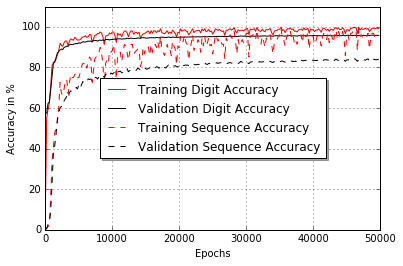

In [5]:
epochs = np.arange(1, n_e+1, logging_info)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model0.logger["training_error"])[:,0], 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(model0.logger["validation_error"])[:,0], 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(model0.logger["training_error"])[:,1], 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(model0.logger["validation_error"])[:,1], 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/SVHN_Multi3.jpg")
plt.show()

In [58]:
test_pred = np.argmax(model0.test_predictions, 2).T

zero_num = test_pred[test_pred[:,0]==10]
one_num = test_pred[test_pred[:,1]==10]
two_num = test_pred[(test_pred[:,1] < 10) & (test_pred[:,2] == 10)]
three_num = test_pred[(test_pred[:,2] < 10) & (test_pred[:,3] == 10)]
four_num = test_pred[(test_pred[:,3] < 10) & (test_pred[:,4] == 10)]
five_num = test_pred[test_pred[:,4] != 10]


print "Predicted and actual images with 0 numbers:", len(zero_num), len(y_test[y_test[:,0]==0])
print "Predicted and actual images with 1 number:", len(one_num), len(y_test[y_test[:,0]==1])
print "Predicted and actual images with 2 numbers:", len(two_num), len(y_test[y_test[:,0]==2])
print "Predicted and actual images with 3 numbers:", len(three_num), len(y_test[y_test[:,0]==3])
print "Predicted and actual images with 4 numbers:", len(four_num), len(y_test[y_test[:,0]==4])
print "Predicted and actual images with 5 numbers:", len(five_num), len(y_test[y_test[:,0]==5])


Predicted and actual images with 0 numbers: 0 0
Predicted and actual images with 1 number: 2560 2483
Predicted and actual images with 2 numbers: 8280 8356
Predicted and actual images with 3 numbers: 2094 2081
Predicted and actual images with 4 numbers: 134 146
Predicted and actual images with 5 numbers: 0 2


## Type 2 Architecture, 3 convolutional layers. BEST RESULTS!!

In [5]:
structure = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                  ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
             ("conv", {"patch_x": 4, "patch_y": 4, "depth": 64, "channels": 64})]

model1 = CNN_Digit_Recogniser_Mod(structure=structure, nb_classes=11, img_rows=32, img_cols=32, max_nb_digits=5)
n_e = 65000
logging_info = 200
seed = 100

model1.fit(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=128, nb_epochs=n_e,
           logging_info=logging_info, seed=seed, p_dropout=0.5)

Minibatch loss value at step 1: 31.72
Minibatch digit accuracy: 13.6%, full sequence accuracy: 0.0%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 201: 7.09
Minibatch digit accuracy: 54.8%, full sequence accuracy: 0.8%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 401: 6.99
Minibatch digit accuracy: 55.5%, full sequence accuracy: 0.0%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 601: 6.87
Minibatch digit accuracy: 57.2%, full sequence accuracy: 0.8%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 801: 6.72
Minibatch digit accuracy: 58.3%, full sequence accuracy: 1.6%
Validation set digit accuracy: 57.5%, full sequence accuracy: 0.5%
Minibatch loss value at step 1001: 6.50
Minibatch digit accuracy: 54.8%, full sequence accuracy: 0.0%
Validation set digit accuracy: 57.5%, full sequence accurac

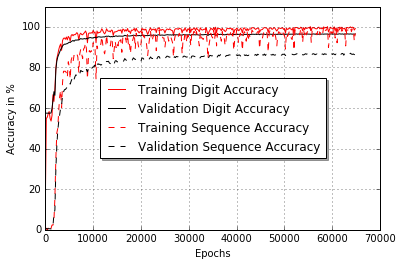

In [6]:
epochs = np.arange(1, n_e+1, logging_info)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model1.logger["training_error"])[:,0], 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(model1.logger["validation_error"])[:,0], 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(model1.logger["training_error"])[:,1], 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(model1.logger["validation_error"])[:,1], 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/SVHN_Multi1.jpg")
plt.show()

## Type 1 Architecture, 2 convolutional layers

In [42]:
structure1 = [("conv", {"patch_x": 5, "patch_y": 5, "depth": 32, "channels": 1}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"}),
                  ("conv", {"patch_x": 5, "patch_y": 5, "depth": 64, "channels": 32}),
                  ("pool", {"side": 2, "stride": 2, "pad": "SAME"})]

model2 = CNN_Digit_Recogniser(structure=structure1, nb_classes=11, img_rows=32, img_cols=32, max_nb_digits=5)
n_e = 50000
logging_info = 200
seed = 100

model2.fit(X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=128, nb_epochs=n_e,
           logging_info=logging_info, seed=seed, p_dropout=0.5)

Minibatch loss value at step 1: 46.60
Minibatch digit accuracy: 24.5%, full sequence accuracy: 0.0%
Validation set digit accuracy: 58.3%, full sequence accuracy: 0.5%
Minibatch loss value at step 201: 7.09
Minibatch digit accuracy: 54.8%, full sequence accuracy: 0.8%
Validation set digit accuracy: 57.6%, full sequence accuracy: 0.7%
Minibatch loss value at step 401: 6.75
Minibatch digit accuracy: 57.7%, full sequence accuracy: 0.8%
Validation set digit accuracy: 60.6%, full sequence accuracy: 1.4%
Minibatch loss value at step 601: 5.98
Minibatch digit accuracy: 60.3%, full sequence accuracy: 2.3%
Validation set digit accuracy: 62.2%, full sequence accuracy: 2.3%
Minibatch loss value at step 801: 5.83
Minibatch digit accuracy: 63.8%, full sequence accuracy: 7.8%
Validation set digit accuracy: 63.7%, full sequence accuracy: 3.4%
Minibatch loss value at step 1001: 5.44
Minibatch digit accuracy: 65.5%, full sequence accuracy: 5.5%
Validation set digit accuracy: 64.8%, full sequence accurac

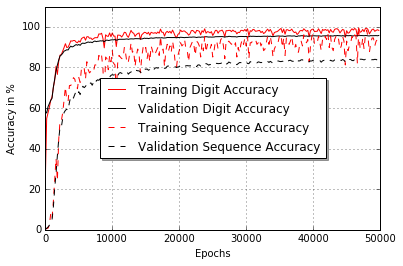

In [43]:
epochs = np.arange(1, n_e+1, logging_info)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Accuracy in %")
plt.ylim(0,110)
plt.grid()
ax.plot(epochs, np.array(model2.logger["training_error"])[:,0], 'r', label='Training Digit Accuracy')
ax.plot(epochs, np.array(model2.logger["validation_error"])[:,0], 'k', label='Validation Digit Accuracy')
ax.plot(epochs, np.array(model2.logger["training_error"])[:,1], 'r--', label='Training Sequence Accuracy')
ax.plot(epochs, np.array(model2.logger["validation_error"])[:,1], 'k--', label='Validation Sequence Accuracy')
legend = ax.legend(loc='center', shadow=True)
plt.savefig("../../report/figs/SVHN_Multi2.jpg")
plt.show()